Перед нами данные о транзакциях 
* date – дата транзакции
* name – имя пользователя
* transaction – статус транзакции

На примере датасета будет показано, насколько важно смотреть на графики распределения показателей в датасете, чтобы не упустить ошибки в данных. Так же посмотрим на топ-5 клиентов, которые совершили больше всего успешных транзакций.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Ale\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [5]:
data_transaction=pd.read_csv('transaction_data.csv')
data_transaction

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled
...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull


Посмотрим какие статусы транзакций есть в данных

In [6]:
data_transaction.transaction.value_counts()

successfull    3692
cancelled      1619
error             4
Name: transaction, dtype: int64

Итак, есть 3 статуса транзакций: 3692 успешных транзакций, 1619 отмененных и 4 с ошибкой

Посмотрим на топ-5 пользователей, которые осуществили больше всех успешных транзакций

In [17]:
success_transaction=data_transaction.query('transaction== "successfull"')\
.groupby('name')\
.agg({'transaction':'count'})\
.sort_values('transaction', ascending = False)\
.head()
success_transaction

,transaction
name,
Svetlana_Smirnova,82
Olga_Smirnova,80
Masha_Ozerova,80
Svetlana_Ivanova,79
Svetlana_Polyanova,78


Больше всех успешных транзакций осуществил пользователь Светлана Смирнова

К нам поступили обновленные данные, где колонка minute означает в какую минуту была сделана транзакция

In [10]:
data_transaction_new=pd.read_csv('transaction_data_updated.csv')
data_transaction_new

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17
...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13


Узнаем, сколько каждый пользователь совершил операций в каждую минуту времени

In [18]:
transaction_number = data_transaction_new\
.groupby(['name', 'minute'], as_index=False)\
.agg({'transaction':'count'})
transaction_number

,name,minute,transaction
0,Ekaterina_Fedorova,0,3
1,Ekaterina_Fedorova,1,4
2,Ekaterina_Fedorova,2,1
3,Ekaterina_Fedorova,3,3
4,Ekaterina_Fedorova,4,3
...,...,...,...
2573,Vasilisa_Smirnova,52,1
2574,Vasilisa_Smirnova,53,1
2575,Vasilisa_Smirnova,54,2
2576,Vasilisa_Smirnova,56,3


 Построим более наглядную таблицу о поминутных транзакциях, заменив пропущенные значениями нулями

In [21]:
user_by_minute_transaction =data_transaction_new.\
pivot_table(index='minute', columns='name', values='transaction', aggfunc='count', fill_value=0).reset_index()
user_by_minute_transaction.head(10)

name,minute,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
0,0,3,4,2,3,4,4,2,1,2,...,0,3,1,1,4,1,3,0,0,1
1,1,4,4,0,4,2,5,4,4,4,...,4,5,3,2,3,3,0,0,3,2
2,2,1,2,4,4,2,1,3,2,3,...,4,1,3,3,0,1,2,1,3,1
3,3,3,0,2,0,5,2,1,3,2,...,1,5,5,2,4,0,3,4,1,0
4,4,3,0,0,3,1,1,2,3,2,...,1,2,2,1,1,2,2,3,0,1
5,5,3,0,2,3,1,0,5,3,1,...,0,2,3,1,0,0,3,0,2,1
6,6,4,1,2,2,0,4,5,2,2,...,2,1,4,1,2,4,1,2,0,2
7,7,3,2,1,2,2,3,4,1,1,...,3,1,1,2,4,1,0,1,2,2
8,8,2,4,3,1,0,3,2,1,1,...,0,1,0,1,2,4,2,1,1,1
9,9,2,4,2,3,4,0,3,2,2,...,2,3,1,2,4,2,3,0,1,4


Такой график поможет разобраться, есть ли в данных ошибка, или же всё хорошо. 

Посмотрим, сколько было совершено транзакций в каждую минуту от всех пользователей

In [23]:
sum_by_minute_transaction=user_by_minute_transaction.sum(axis=1)   #указали по какой оси нужно суммировать
sum_by_minute_transaction.head(10)

0    111
1    146
2    125
3    132
4     96
5    104
6    116
7    118
8    119
9    122
dtype: int64

<AxesSubplot:>

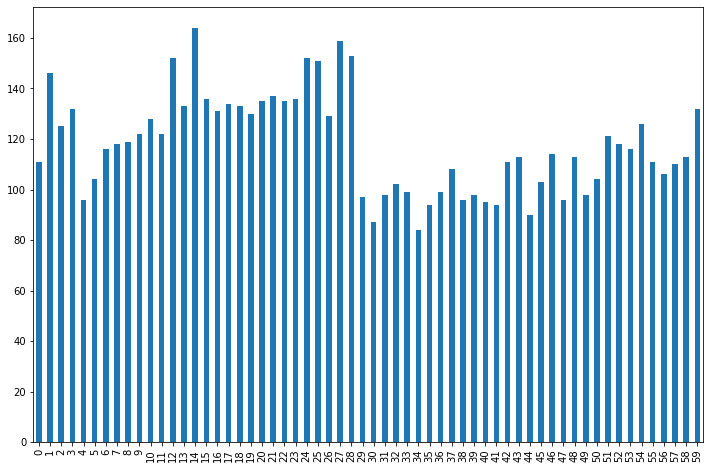

In [24]:
#построим график, чтобы лучше рассмотреть данные о транзакциях в каждую минуту от всех пользователей
plt.figure(figsize=(12,8))
sum_by_minute_transaction.plot.bar()

Изучая график, видно, что больше транзакций почему-то в первой половине часа. Такое может случиться, если после 28 минуты часть датчиков, которые собирают данные, отключились и мы не получаем часть информации. Но чаще всего ошибка кроется в неправильной обработке данных. Посмотрим еще раз внимательно на дату таблицы, которая к нам поступила.

In [26]:
data_transaction_new.head(10)

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17
5,2020-03-02 01:09:55,Irina_Polyanova,cancelled,9
6,2020-03-02 00:54:12,Olga_Lesnova,successfull,54
7,2020-03-02 00:18:43,Irina_Lesnova,successfull,18
8,2020-03-02 00:06:10,Vasilisa_Petrova,successfull,6
9,2020-03-02 00:47:06,Olga_Petrova,successfull,47


Можем заметить, что ошибка действительно в том, что нам прислали неправильные данные, здесь минуты считаются неправильно. Например, во 2 строчке пошел уже второй час, а минута в колонке minute считается как 6-ая, а не 66-ая как нужно.

Посмотрим на минимуму и максимуму 

In [27]:
print("Минимальное время:", data_transaction_new.date.min(), "Максимальное время:", data_transaction_new.date.max())

Минимальное время: 2020-03-02 00:00:00 Максимальное время: 2020-03-02 01:29:05


Видим, что данные принимаются только полтора часа, поэтому дополнительные полчаса второго часа переходят в промежуток от 0 до 30 неверно. Поэтому нужно исправить ошибку - правильно извлечь количетсво минут из даты.

In [28]:
data_transaction_new.dtypes

date           object
name           object
transaction    object
minute          int64
dtype: object

In [29]:
#переведем строку с датой в формат времени, чтобы можно было извлечь минуты и часы
data_transaction_new.date=pd.to_datetime(data_transaction_new.date)

In [30]:
data_transaction_new.dtypes

date           datetime64[ns]
name                   object
transaction            object
minute                  int64
dtype: object

In [32]:
#извлекаем из колонки с датой минуты и часы. часы переводим в минуты
data_transaction_new['true_minute'] = data_transaction_new.date.dt.minute + data_transaction_new.date.dt.hour*60
data_transaction_new

,date,name,transaction,minute,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17
...,...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13,13


Теперь видим, что минуты извлекаются корректно, колонку minute можно удалить

In [34]:
data_transaction_new.drop(columns = ['minute'], axis = 1)

,date,name,transaction,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17
...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13


C:\Users\Ale\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='true_minute', ylabel='count'>

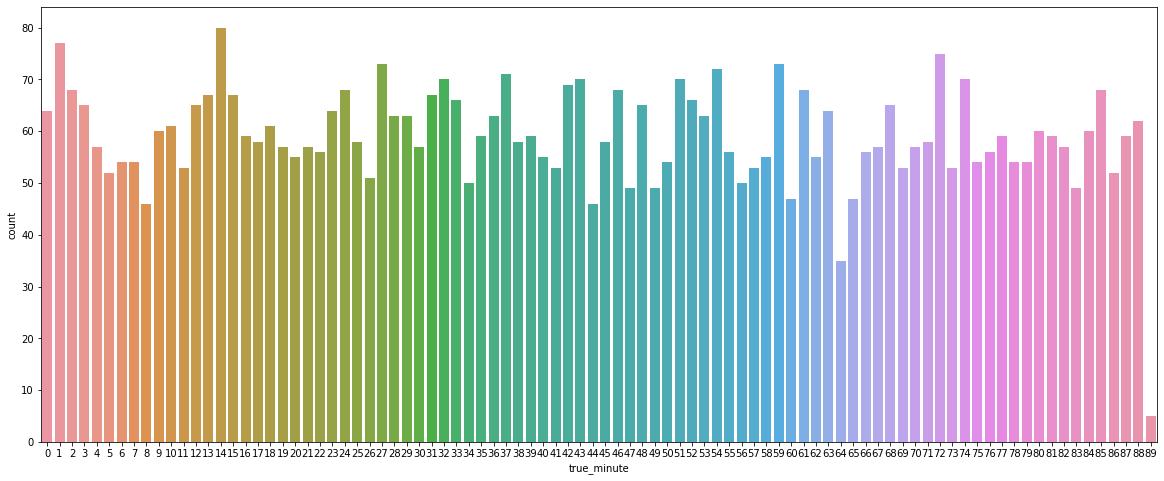

In [37]:
plt.figure(figsize=(20,8))
sns.countplot(data_transaction_new['true_minute'])

Теперь по графику видно, что данные транзакций по минутам распределены более равномерно